# Guided Capstone Step 6. Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [1]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
path=os.getcwd()
print(path)
path="D:\SPRINGBOARD_1\GuidedCapstone\Step 2\Step 2\data"
os.chdir(path)
os.listdir(path)

C:\Users\MONIKA


['step2_output.csv', 'step3_output.csv']

In [4]:
df=pd.read_csv(os.path.join(path,r'step3_output.csv') )
df.head(5)

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
0,Hilltop Ski Area,Alaska,2090,294,0,0.0,0,0,0,1,...,30.0,30.000000,150.000000,36.0,69.0,30.0,34.00000,152.0,30.0,0
1,Sunrise Park Resort,Arizona,11100,1800,0,0.0,0,1,2,3,...,800.0,80.000000,115.000000,49.0,250.0,74.0,78.00000,104.0,80.0,1
2,Yosemite Ski & Snowboard Area,California,7800,600,0,0.0,0,0,0,1,...,88.0,174.873239,110.000000,84.0,300.0,47.0,47.00000,107.0,0.0,1
3,Boreal Mountain Resort,California,7700,500,0,0.0,0,1,1,3,...,380.0,200.000000,150.000000,54.0,400.0,49.0,64.16681,150.0,200.0,1
4,Dodge Ridge,California,8200,1600,0,0.0,0,0,1,2,...,862.0,174.873239,115.103943,69.0,350.0,78.0,78.00000,140.0,0.0,1


## Fit Models with Training Dataset

**<font color='teal'> Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### Best Model 

In [5]:
df2=df
df2.drop(['state'],axis=1,inplace = True)
df2.head()

,Name,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
0,Hilltop Ski Area,2090,294,0,0.0,0,0,0,1,0,...,30.0,30.000000,150.000000,36.0,69.0,30.0,34.00000,152.0,30.0,0
1,Sunrise Park Resort,11100,1800,0,0.0,0,1,2,3,1,...,800.0,80.000000,115.000000,49.0,250.0,74.0,78.00000,104.0,80.0,1
2,Yosemite Ski & Snowboard Area,7800,600,0,0.0,0,0,0,1,3,...,88.0,174.873239,110.000000,84.0,300.0,47.0,47.00000,107.0,0.0,1
3,Boreal Mountain Resort,7700,500,0,0.0,0,1,1,3,1,...,380.0,200.000000,150.000000,54.0,400.0,49.0,64.16681,150.0,200.0,1
4,Dodge Ridge,8200,1600,0,0.0,0,0,1,2,5,...,862.0,174.873239,115.103943,69.0,350.0,78.0,78.00000,140.0,0.0,1


In [13]:
df['Name']

0                       Hilltop Ski Area
1                    Sunrise Park Resort
2          Yosemite Ski & Snowboard Area
3                 Boreal Mountain Resort
4                            Dodge Ridge
                     ...                
171                        Hogadon Basin
172            Sleeping Giant Ski Resort
173                     Snow King Resort
174    Snowy Range Ski & Recreation Area
175                  White Pine Ski Area
Name: Name, Length: 176, dtype: object

In [7]:
from sklearn import preprocessing
X2 = df2.drop(['Name','AdultWeekend'], axis=1) 
y2 = df2['AdultWeekend'] 
scaler2 = preprocessing.StandardScaler().fit(X2)
X_scaled2=scaler2.transform(X2) 

print("X---",X2,"y---",y2,"scaler---",scaler2,"X_scaled---",X_scaled2)

X---      summit_elev  vertical_drop  trams  fastEight  fastSixes  fastQuads  quad  \
0           2090            294      0        0.0          0          0     0   
1          11100           1800      0        0.0          0          1     2   
2           7800            600      0        0.0          0          0     0   
3           7700            500      0        0.0          0          1     1   
4           8200           1600      0        0.0          0          0     1   
..           ...            ...    ...        ...        ...        ...   ...   
171         8000            640      0        0.0          0          0     0   
172         7428            810      0        0.0          0          0     0   
173         7808           1571      0        0.0          0          0     1   
174         9663            990      0        0.0          0          0     0   
175         9500           1100      0        0.0          0          0     0   

     triple  double  s

In [56]:
from sklearn.model_selection import train_test_split
y2 = y2.ravel()
X_train2, X_test2,y_train2, y_test2 = train_test_split(X_scaled2, y2, test_size=0.25, random_state=1)

In [57]:
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
lm = linear_model.LinearRegression()
model2 = lm.fit(X_train2,y_train2)

In [60]:

y_pred2=model2.predict(X_test2)
print("X_test",X_test2,"\ny_pred",y_pred2 )

X_test [[ 1.72072911  0.34178839  0.         ...  1.47153189 -0.94317542
   0.58111856]
 [-0.7559156  -0.34407846  0.         ... -1.77618145 -0.39083722
  -0.76462969]
 [-0.64763008 -0.34407846  0.         ... -0.10456429  0.41642631
  -0.76462969]
 ...
 [-0.76210335 -1.08921776  0.         ...  0.37557209 -0.09342434
  -0.76462969]
 [-0.49293647  0.16735806  0.         ...  0.03871718  2.77448558
  -0.76462969]
 [-0.98950296 -1.03841281  0.         ... -0.39112723  0.01279455
  -0.76462969]] 
y_pred [53.90401302 56.24971539 40.1601437  50.90139668 60.88786166 47.87237028
 52.34516943 74.90701923 37.50895989 45.64447885 75.59328597 78.04980122
 47.14896108 62.56332424 59.45968503 48.61841788 46.73699381 41.17902216
 46.12098935 40.86261933 48.44508742 54.23245195 57.71515226 61.07076437
 35.64947554 62.59536216 53.93399851 37.27614857 50.40500693 58.88561327
 53.19268748 74.74227585 95.46457734 67.71100976 56.44576039 78.39876585
 52.72642025 87.66912359 54.98441022 50.17271473 52.015

In [61]:

var_score2=explained_variance_score(y_test2 , y_pred2 )
mean_abs_err2=mean_absolute_error(y_test2 , y_pred2)
print("var_score2---",var_score2,"\nmean_abs_err2---",mean_abs_err2)

var_score2--- 0.5325426531233332 
mean_abs_err2--- 7.37396972614105


## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

In [38]:
X_Mountain=df[df['Name'].str.contains('June Mountain')]
X_Mountain

,Name,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
6,June Mountain,10090,2590,0,0.0,0,2,0,0,4,...,1500.0,174.873239,115.103943,58.0,250.0,57.916957,64.16681,128.0,0.0,1


**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

In [39]:
X_Mountain.drop(['Name','AdultWeekend'], axis=1 , inplace=True)
Y_Mountain = df['AdultWeekend'] 
scaler = preprocessing.StandardScaler().fit(X_Mountain)
X_scaled_Mountain=scaler.transform(X_Mountain) 

C:\Users\MONIKA\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [43]:
y_pred_Mountain=model2.predict(X_scaled_Mountain)
print("Predicted AdultWeekend Price for June Mountain Resort is =",y_pred_Mountain)

Predicted AdultWeekend Price for June Mountain Resort is = [56.35202407]


**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [42]:
Mountain_ActualPrice=df[df['Name'].str.contains('June Mountain')]['AdultWeekend']
print("Actual AdultWeekend Price for June Mountain Resort ",Mountain_ActualPrice)

Actual AdultWeekend Price for June Mountain Resort  6    64.16681
Name: AdultWeekend, dtype: float64


**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

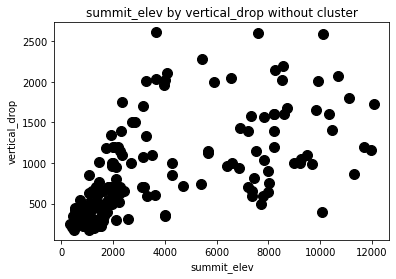

In [46]:
# plt.scatter(df['summit_elev'], df['vertical_drop'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(df['summit_elev'], df['vertical_drop'], c='black', s=100)
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop without cluster')
plt.savefig('D:/SPRINGBOARD_1/GuidedCapstone/Step 2/Step 2/datafigs/fig1.png',bbox_inches='tight')

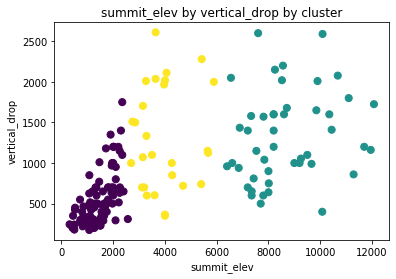

In [47]:
plt.scatter(df['summit_elev'], df['vertical_drop'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
# plt.scatter(df['summit_elev'], df['vertical_drop'], c='black', s=100)
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')
plt.savefig('D:/SPRINGBOARD_1/GuidedCapstone/Step 2/Step 2/datafigs/fig2.png',bbox_inches='tight')

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and Python scripts you've created and clean them up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. It's used extensively in production environments where machine learning models are deployed on an industrial scale!**<font color='teal'> Run the example code below to save out your callable model. Notice that we save it in the models folder we created in our previous guided capstone step.</font>** 

In [50]:
import pickle
s = pickle.dumps(model2)
from joblib import dump, load
dump(model2, 'D:/SPRINGBOARD_1/GuidedCapstone/Step 2/Step 2/models/regression_model_adultweekend.joblib') 

['D:/SPRINGBOARD_1/GuidedCapstone/Step 2/Step 2/models/regression_model_adultweekend.joblib']

## Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file, then upload it to your github repository.</font>** 

In [69]:
index=['Model1','Model2','Model3']
metrics=pd.DataFrame(abs(lm.coef_), X2.columns, columns=['Coefficient'])
metrics.sort_values(['Coefficient'],ascending=False)
print("var_score2---",var_score2,"\nmean_abs_err2---",mean_abs_err2)
metrics['Variance']=var_score2
metrics['MAE']=mean_abs_err2
metrics.head(5)


var_score2--- 0.5325426531233332 
mean_abs_err2--- 7.37396972614105


,Coefficient,Variance,MAE
summit_elev,2.988854e+00,0.532543,7.37397
vertical_drop,2.687827e+00,0.532543,7.37397
trams,0.000000e+00,0.532543,7.37397
fastEight,1.776357e-15,0.532543,7.37397
fastSixes,8.881784e-16,0.532543,7.37397


In [70]:
dataFolderPath=r"D:\SPRINGBOARD_1\GuidedCapstone\Step 2\Step 2\data"
df.to_csv(os.path.join(dataFolderPath,r'model_performance_metrics.csv') , index=False)
os.listdir(dataFolderPath)

['model_performance_metrics.csv', 'step2_output.csv', 'step3_output.csv']